# Milk Quality Prediction

## Data Loading

In [2]:
# Importing dataset via kaggle

!kaggle datasets download -d cpluzshrijayan/milkquality

Dataset URL: https://www.kaggle.com/datasets/cpluzshrijayan/milkquality
License(s): unknown
  0%|                                               | 0.00/1.24k [00:00<?, ?B/s]
100%|██████████████████████████████████████| 1.24k/1.24k [00:00<00:00, 6.16MB/s]


In [3]:
# Exporting dataset from zipfile

import zipfile
zip_ref = zipfile.ZipFile('/home/bhxveshhh/ML/Milk Quality Prediction/milkquality.zip', 'r')
zip_ref.extractall('/home/bhxveshhh/ML/Milk Quality Prediction')
zip_ref.close()

## Exploratory Data Analysis

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [32]:
df = pd.read_csv('milknew.csv')

In [6]:
df.head(5)

,pH,Temprature,Taste,Odor,Fat,Turbidity,Colour,Grade
0,6.6,35,1,0,1,0,254,high
1,6.6,36,0,1,0,1,253,high
2,8.5,70,1,1,1,1,246,low
3,9.5,34,1,1,0,1,255,low
4,6.6,37,0,0,0,0,255,medium


In [7]:
df.shape

(1059, 8)

In [9]:
df.size

8472

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1059 entries, 0 to 1058
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   pH          1059 non-null   float64
 1   Temprature  1059 non-null   int64  
 2   Taste       1059 non-null   int64  
 3   Odor        1059 non-null   int64  
 4   Fat         1059 non-null   int64  
 5   Turbidity   1059 non-null   int64  
 6   Colour      1059 non-null   int64  
 7   Grade       1059 non-null   object 
dtypes: float64(1), int64(6), object(1)
memory usage: 66.3+ KB


In [11]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
pH,1059.0,6.630123,1.399679,3.0,6.5,6.7,6.8,9.5
Temprature,1059.0,44.226629,10.098364,34.0,38.0,41.0,45.0,90.0
Taste,1059.0,0.546742,0.498046,0.0,0.0,1.0,1.0,1.0
Odor,1059.0,0.432483,0.495655,0.0,0.0,0.0,1.0,1.0
Fat,1059.0,0.671388,0.469930,0.0,0.0,1.0,1.0,1.0
Turbidity,1059.0,0.491029,0.500156,0.0,0.0,0.0,1.0,1.0
Colour,1059.0,251.840415,4.307424,240.0,250.0,255.0,255.0,255.0


In [14]:
df.isnull().sum()

pH            0
Temprature    0
Taste         0
Odor          0
Fat           0
Turbidity     0
Colour        0
Grade         0
dtype: int64

In [15]:
df.duplicated().sum()

np.int64(976)

In [16]:
df.nunique()

pH            16
Temprature    17
Taste          2
Odor           2
Fat            2
Turbidity      2
Colour         9
Grade          3
dtype: int64

In [17]:
df['Grade'].unique()

array(['high', 'low', 'medium'], dtype=object)

In [18]:
df['Grade'].value_counts()

Grade
low       429
medium    374
high      256
Name: count, dtype: int64

## Data Visualization

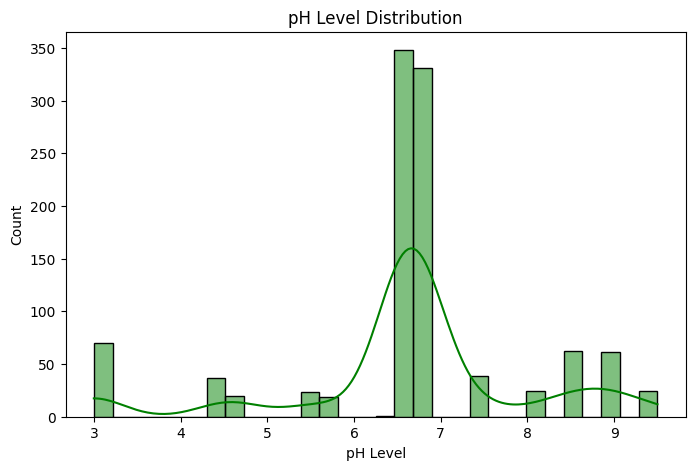

In [33]:
# Histogram – pH Distribution

plt.figure(figsize=(8, 5))
sns.histplot(df['pH'], bins=30, kde=True, color='green')
plt.xlabel('pH Level')
plt.title('pH Level Distribution')
plt.show()

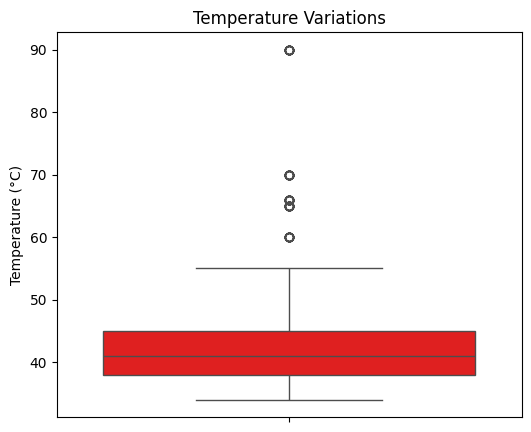

In [34]:
# Box Plot 

plt.figure(figsize=(6, 5))
sns.boxplot(y=df['Temprature'], color='red')
plt.title('Temperature Variations')
plt.ylabel('Temperature (°C)')
plt.show()

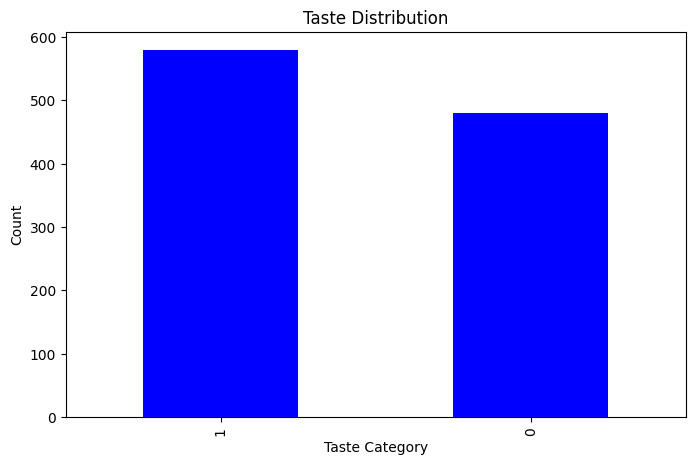

In [35]:
# Bar Chart – Taste Distribution

plt.figure(figsize=(8, 5))
df['Taste'].value_counts().plot(kind='bar', color='blue')
plt.xlabel('Taste Category')
plt.ylabel('Count')
plt.title('Taste Distribution')
plt.show()

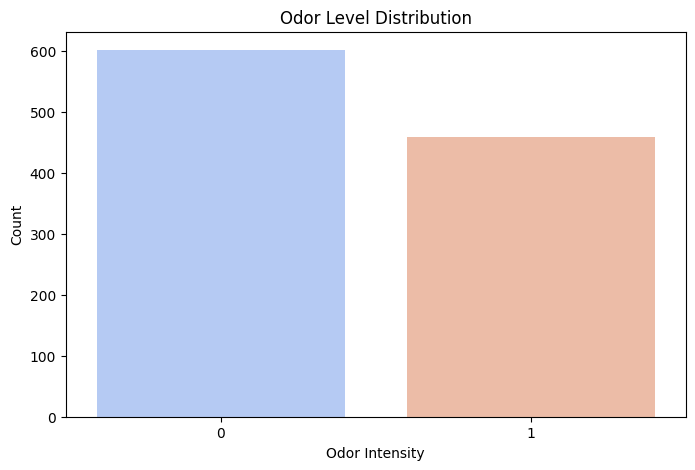

In [36]:
# Count Plot – Odor Levels

plt.figure(figsize=(8, 5))
sns.countplot(x=df['Odor'], palette='coolwarm')
plt.xlabel('Odor Intensity')
plt.ylabel('Count')
plt.title('Odor Level Distribution')
plt.show()

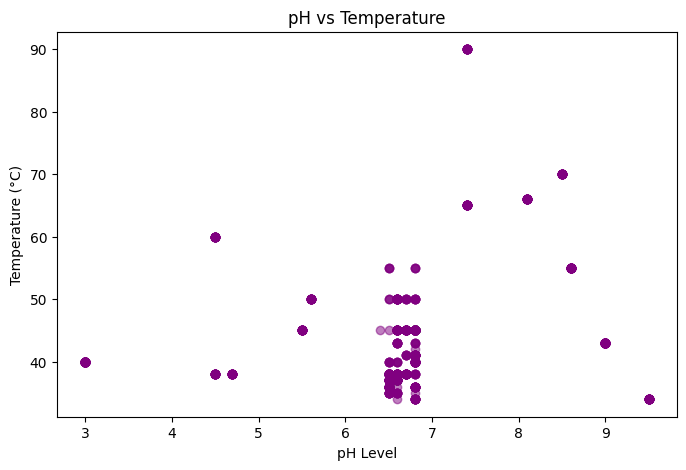

In [37]:
# Scatter Plot – pH vs Temperature

plt.figure(figsize=(8, 5))
plt.scatter(df['pH'], df['Temprature'], color='purple', alpha=0.5)
plt.xlabel('pH Level')
plt.ylabel('Temperature (°C)')
plt.title('pH vs Temperature')
plt.show()

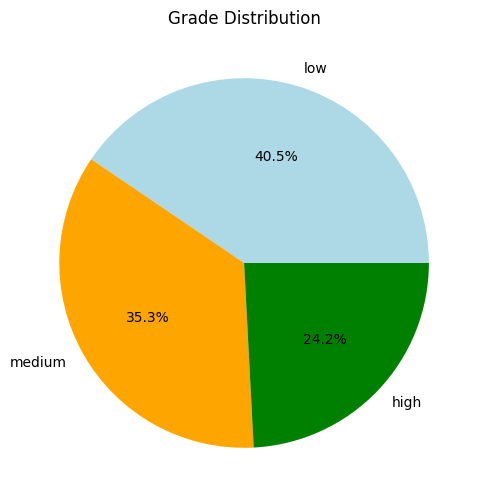

In [39]:
# Pie Chart – Grade Distribution

plt.figure(figsize=(6, 6))
df['Grade'].value_counts().plot(kind='pie', autopct='%1.1f%%', colors=['lightblue', 'orange', 'green'])
plt.title('Grade Distribution')
plt.ylabel('')
plt.show()

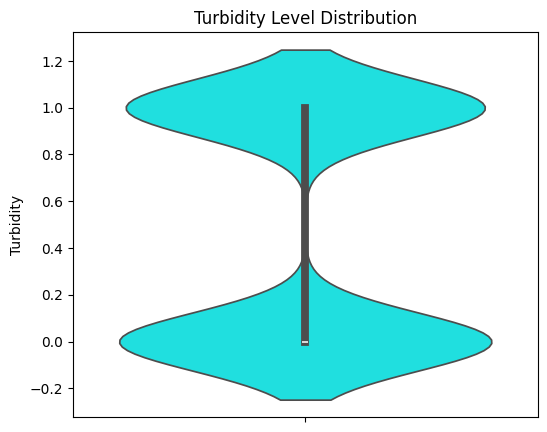

In [40]:
# Violin Plot – Turbidity Levels

plt.figure(figsize=(6, 5))
sns.violinplot(y=df['Turbidity'], color='cyan')
plt.title('Turbidity Level Distribution')
plt.ylabel('Turbidity')
plt.show()

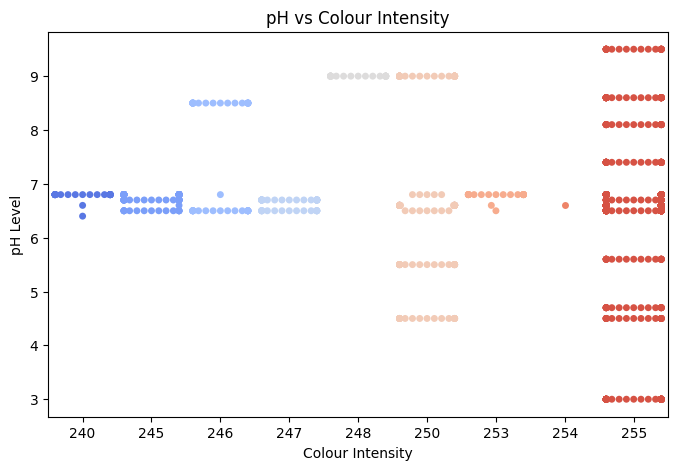

In [42]:
# Swarm Plot – pH vs Colour

plt.figure(figsize=(8, 5))
sns.swarmplot(x=df['Colour'], y=df['pH'], palette='coolwarm')
plt.xlabel('Colour Intensity')
plt.ylabel('pH Level')
plt.title('pH vs Colour Intensity')
plt.show()

## Data Preprocessing

In [19]:
# Label Encoding Grade Column

from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

df['Grade'] = le.fit_transform(df['Grade'])

In [24]:
X = df.drop('Grade', axis=1)
y = df['Grade']

In [25]:
# Standard Scaler on X values

from sklearn.preprocessing import StandardScaler

SS = StandardScaler()

X = SS.fit_transform(X)

In [26]:
# Train Test Split

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Model Building

In [27]:
from sklearn.linear_model import LogisticRegression, RidgeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier, BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import r2_score

In [28]:
logistic_clf = LogisticRegression()
ridge_clf = RidgeClassifier()
xgboost_clf = XGBClassifier()
random_forest_clf = RandomForestClassifier()
ada_boost_clf = AdaBoostClassifier()
grad_boost_clf = GradientBoostingClassifier()
bagging_clf = BaggingClassifier()
decision_tree_clf = DecisionTreeClassifier()
svm_clf = SVC()

In [29]:
model_li = [logistic_clf, ridge_clf, xgboost_clf, random_forest_clf, 
            ada_boost_clf, grad_boost_clf, bagging_clf, decision_tree_clf, svm_clf]

scores = []
for model in model_li:
    model.fit(X_train, y_train)
    scores.append(accuracy_score(y_test, model.predict(X_test)))

print(scores)

[0.839622641509434, 0.6745283018867925, 0.9952830188679245, 0.9952830188679245, 0.910377358490566, 0.9905660377358491, 0.9905660377358491, 0.9905660377358491, 0.9292452830188679]


## Model Evaluation

In [30]:
from sklearn.metrics import classification_report, confusion_matrix

Model: LogisticRegression
Classification Report:
               precision    recall  f1-score   support

           0       0.68      0.79      0.73        48
           1       0.86      0.88      0.87        78
           2       0.93      0.83      0.88        86

    accuracy                           0.84       212
   macro avg       0.83      0.83      0.83       212
weighted avg       0.85      0.84      0.84       212

Confusion Matrix:
 [[38  7  3]
 [ 7 69  2]
 [11  4 71]]


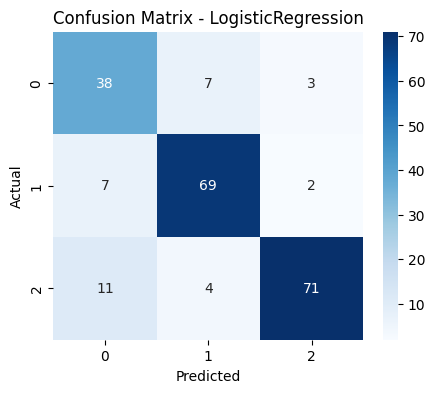

Model: RidgeClassifier
Classification Report:
               precision    recall  f1-score   support

           0       0.44      0.31      0.37        48
           1       0.66      0.69      0.68        78
           2       0.77      0.86      0.81        86

    accuracy                           0.67       212
   macro avg       0.62      0.62      0.62       212
weighted avg       0.65      0.67      0.66       212

Confusion Matrix:
 [[15 21 12]
 [14 54 10]
 [ 5  7 74]]


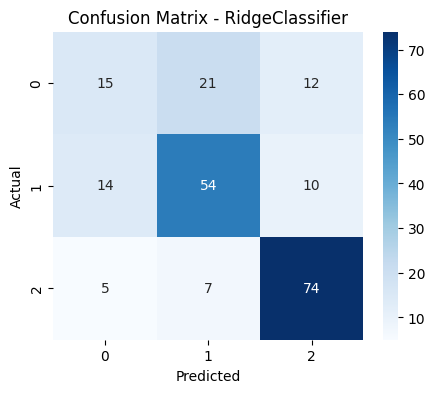

Model: XGBClassifier
Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.98      0.99        48
           1       1.00      1.00      1.00        78
           2       0.99      1.00      0.99        86

    accuracy                           1.00       212
   macro avg       1.00      0.99      0.99       212
weighted avg       1.00      1.00      1.00       212

Confusion Matrix:
 [[47  0  1]
 [ 0 78  0]
 [ 0  0 86]]


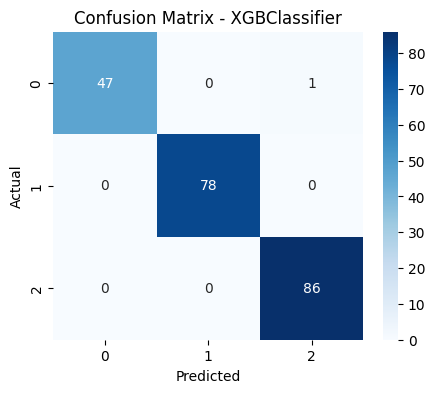

Model: RandomForestClassifier
Classification Report:
               precision    recall  f1-score   support

           0       0.98      1.00      0.99        48
           1       1.00      0.99      0.99        78
           2       1.00      1.00      1.00        86

    accuracy                           1.00       212
   macro avg       0.99      1.00      0.99       212
weighted avg       1.00      1.00      1.00       212

Confusion Matrix:
 [[48  0  0]
 [ 1 77  0]
 [ 0  0 86]]


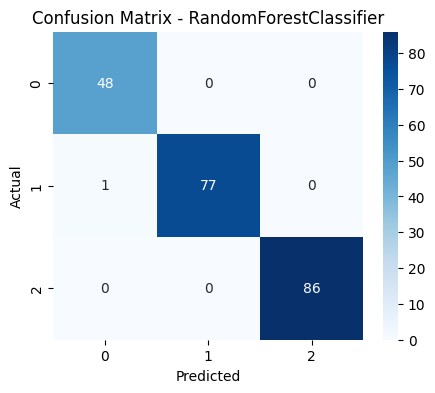

Model: AdaBoostClassifier
Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.75      0.80        48
           1       1.00      0.97      0.99        78
           2       0.86      0.94      0.90        86

    accuracy                           0.91       212
   macro avg       0.91      0.89      0.90       212
weighted avg       0.91      0.91      0.91       212

Confusion Matrix:
 [[36  0 12]
 [ 1 76  1]
 [ 5  0 81]]


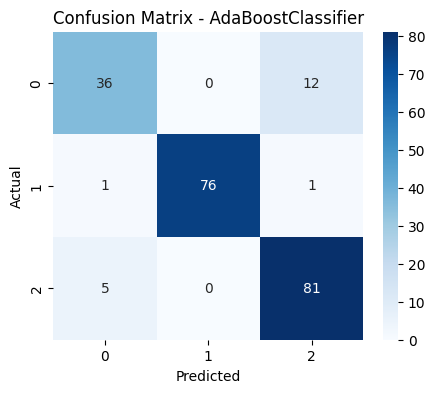

Model: GradientBoostingClassifier
Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.98      0.99        48
           1       1.00      0.99      0.99        78
           2       0.98      1.00      0.99        86

    accuracy                           0.99       212
   macro avg       0.99      0.99      0.99       212
weighted avg       0.99      0.99      0.99       212

Confusion Matrix:
 [[47  0  1]
 [ 0 77  1]
 [ 0  0 86]]


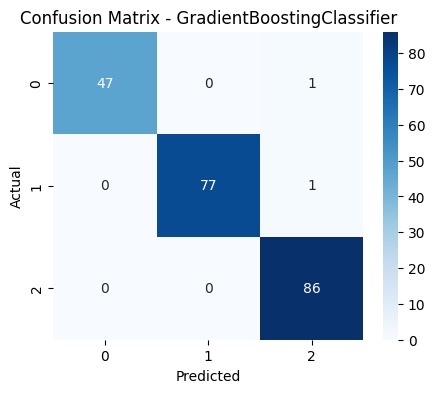

Model: BaggingClassifier
Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.98      0.99        48
           1       1.00      0.99      0.99        78
           2       0.98      1.00      0.99        86

    accuracy                           0.99       212
   macro avg       0.99      0.99      0.99       212
weighted avg       0.99      0.99      0.99       212

Confusion Matrix:
 [[47  0  1]
 [ 0 77  1]
 [ 0  0 86]]


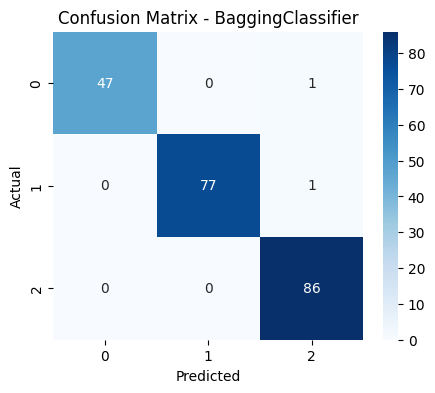

Model: DecisionTreeClassifier
Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.98      0.98        48
           1       1.00      0.99      0.99        78
           2       0.99      1.00      0.99        86

    accuracy                           0.99       212
   macro avg       0.99      0.99      0.99       212
weighted avg       0.99      0.99      0.99       212

Confusion Matrix:
 [[47  0  1]
 [ 1 77  0]
 [ 0  0 86]]


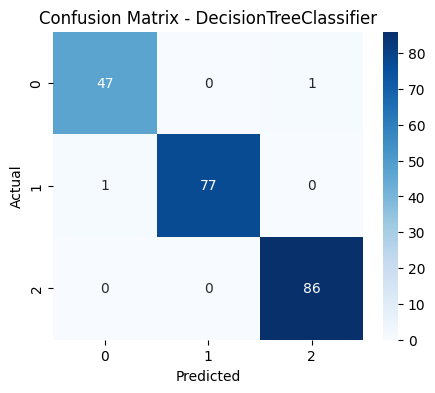

Model: SVC
Classification Report:
               precision    recall  f1-score   support

           0       0.77      1.00      0.87        48
           1       1.00      0.95      0.97        78
           2       0.99      0.87      0.93        86

    accuracy                           0.93       212
   macro avg       0.92      0.94      0.92       212
weighted avg       0.94      0.93      0.93       212

Confusion Matrix:
 [[48  0  0]
 [ 3 74  1]
 [11  0 75]]


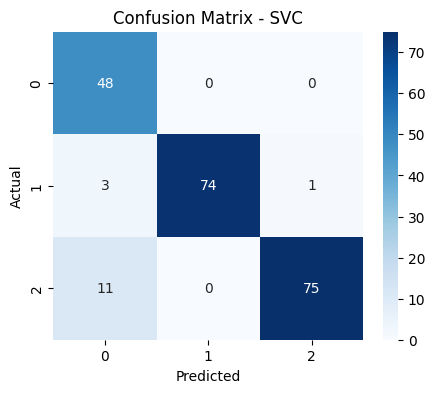

In [31]:
for model in model_li:
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    print(f"Model: {model.__class__.__name__}")
    print("Classification Report:\n", classification_report(y_test, y_pred))
    print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

    # Plot the confusion matrix
    plt.figure(figsize=(5, 4))
    sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt="d", cmap="Blues")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.title(f"Confusion Matrix - {model.__class__.__name__}")
    plt.show()